In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Import datasets
df_gdp = pd.read_csv('GDP-2015.csv')
df_le = pd.read_csv('life-expectancy.csv')
df_alcohol = pd.read_csv('total-alcohol-consumption-per-capita-litres-of-pure-alcohol.csv')
df_satisfaction = pd.read_csv('happiness-cantril-ladder.csv')
df_gdp2 = pd.read_csv('gross-domestic-product.csv')

In [4]:
# Renaming and dropping unnecessary columns
df_gdp = df_gdp.rename(columns = {'Entity' : 'Country'})
df_gdp = df_gdp.drop(columns = ['Code'])

df_le = df_le.rename(columns = {'Entity' : 'Country', 'Life expectancy (years)' : 'Life expectancy'})
df_le = df_le.drop(columns = ['Code'])

df_alcohol = df_alcohol.rename(columns = {'Entity' : 'Country', 'Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)' : 'Total alcohol consumption per capita'})
df_alcohol = df_alcohol.drop(columns = ['Code'])
df_alcohol['Year'] = 2016

df_satisfaction = df_satisfaction.rename(columns = {'Entity' : 'Country', 'Life satisfaction in Cantril Ladder (World Happiness Report 2019)' : 'Life satisfaction'})
df_satisfaction = df_satisfaction.drop(columns = ['Code'])

df_gdp2 = df_gdp2.rename(columns = {'Entity' : 'Country', 'GDP (constant 2010 US$)' : 'GDP'})
df_gdp2 = df_gdp2.drop(columns = ['Code'])
df_gdp2 = df_gdp2[df_gdp2['Year'] == 2015]

In [5]:
# Merge and rework data
df_2015 = pd.merge(df_gdp, df_le)
df_2015["GDP per capita"] = np.log10(df_2015["GDP per capita"])

df_alcsat = pd.merge(df_alcohol, df_satisfaction)

df_2015_2 = pd.merge(df_gdp2, df_le)
df_2015_2["GDP"] = np.log10(df_2015_2["GDP"])

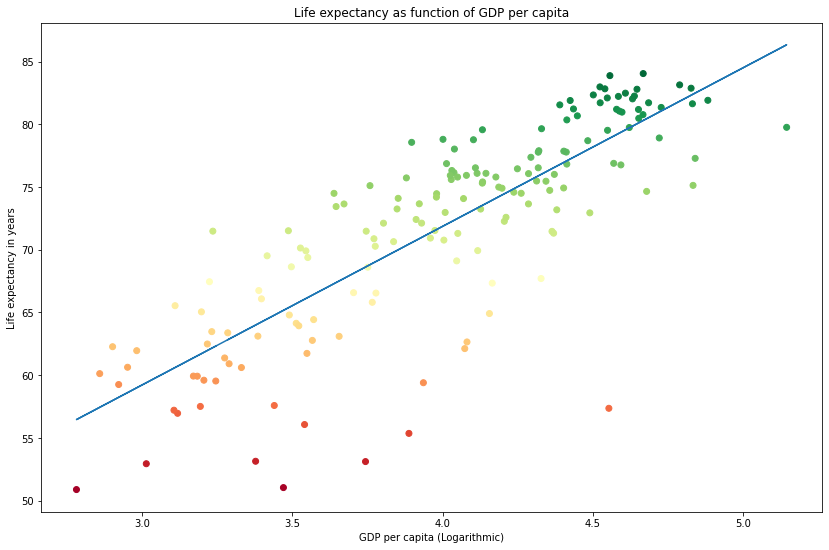

In [14]:
# Map data to x, y values and create regression line
x = df_2015["GDP per capita"]
y = df_2015["Life expectancy"]
m, b = np.polyfit(x, y, 1)

# Create regression line and scatter plot
plt.plot(x, m*x + b)
plt.scatter(x, y, c=df_2015["Life expectancy"], cmap="RdYlGn")

# Create title and labels
plt.title('Life expectancy as function of GDP per capita')
plt.xlabel('GDP per capita (Logarithmic)')
plt.ylabel('Life expectancy in years')

# Increase size of figure
plt.rcParams['figure.figsize'] = [14, 9]

plt.show()

In [15]:
# Mean and STD
df_mean_le = df_2015["Life expectancy"].mean()
df_std_le = df_2015["Life expectancy"].std()
df_highlife = (df_2015[df_2015["Life expectancy"] > (df_mean_le + df_std_le)])

print(df_highlife)

            Country  Year  GDP per capita  Life expectancy
6         Australia  2015        4.646757           82.794
7           Austria  2015        4.651714           81.182
13          Belgium  2015        4.596938           80.969
24           Canada  2015        4.631890           82.026
37           Cyprus  2015        4.413350           80.350
40          Denmark  2015        4.652623           80.475
50          Finland  2015        4.578868           81.196
51           France  2015        4.584874           82.224
55          Germany  2015        4.666761           80.770
57           Greece  2015        4.389963           81.548
63        Hong Kong  2015        4.667490           84.043
65          Iceland  2015        4.608226           82.481
70          Ireland  2015        4.727313           81.344
71           Israel  2015        4.501456           82.340
72            Italy  2015        4.539991           82.828
74            Japan  2015        4.556664           83.8

In [16]:
# Low GDP high Life expectancy
df_mean_gdp = df_2015["GDP per capita"].mean()
df_std_gdp = df_2015["GDP per capita"].std()
df_lowgdp = (df_2015[df_2015["GDP per capita"] < (df_mean_gdp)])

df_lowhigh = (df_lowgdp[df_lowgdp["Life expectancy"] > (df_mean_le)])
print(df_lowhigh)

         Country  Year  GDP per capita  Life expectancy
5        Armenia  2015        3.980094           74.467
11      Barbados  2015        4.001301           78.801
25    Cape Verde  2015        3.803321           72.117
36          Cuba  2015        3.897022           78.561
42      Dominica  2015        3.979412           74.194
46   El Salvador  2015        3.911850           72.412
58     Guatemala  2015        3.848497           73.250
62      Honduras  2015        3.638689           74.495
73       Jamaica  2015        3.852175           74.098
85         Libya  2015        3.930134           72.121
100      Morocco  2015        3.879497           75.726
107    Nicaragua  2015        3.672005           73.649
114    Palestine  2015        3.645619           73.442
116     Paraguay  2015        3.922414           73.662
162      Vietnam  2015        3.758382           75.110


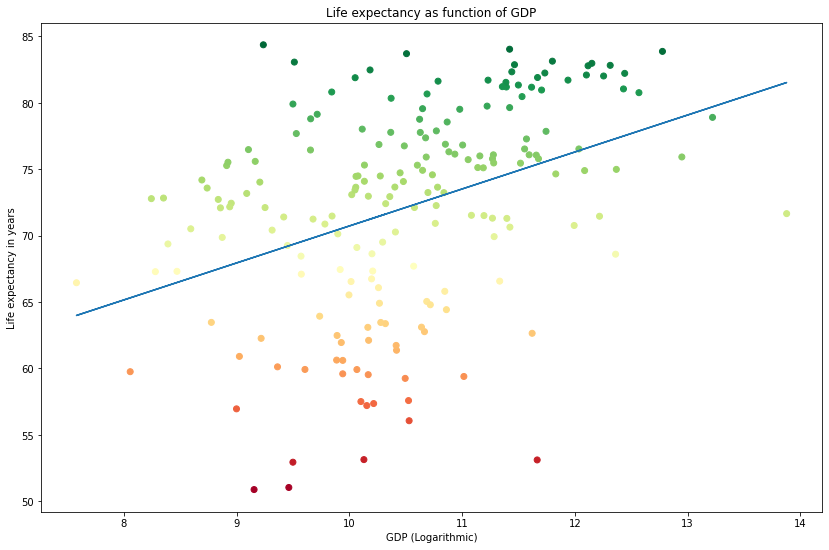

In [17]:
# Map data to x, y values and create regression line
x = df_2015_2["GDP"]
y = df_2015_2["Life expectancy"]
m, b = np.polyfit(x, y, 1)

# Create regression line and scatter plot
plt.plot(x, m*x + b)
plt.scatter(x, y, c=df_2015_2["Life expectancy"], cmap="RdYlGn")

# Create title and labels
plt.title('Life expectancy as function of GDP')
plt.xlabel('GDP (Logarithmic)')
plt.ylabel('Life expectancy in years')

# Increase size of figure
plt.rcParams['figure.figsize'] = [14, 9]

plt.show()

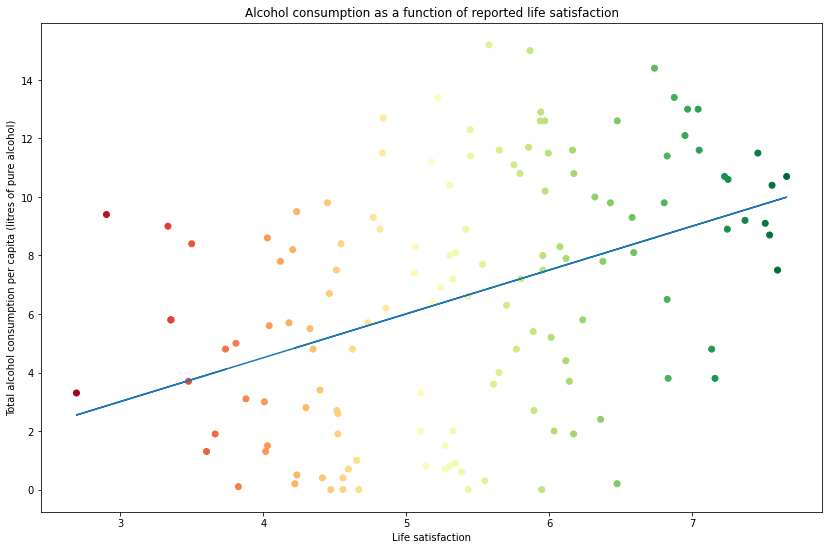

In [18]:
# Map data to x, y values and create regression line
x = df_alcsat["Life satisfaction"]
y = df_alcsat["Total alcohol consumption per capita"]
m, b = np.polyfit(x, y, 1)

# Create regression line and scatter plot
plt.plot(x, m*x + b)
plt.scatter(x, y, c=df_alcsat["Life satisfaction"], cmap="RdYlGn")

# Create title and labels
plt.title('Alcohol consumption as a function of reported life satisfaction')
plt.xlabel('Life satisfaction')
plt.ylabel('Total alcohol consumption per capita (litres of pure alcohol)')

# Increase size of figure
plt.rcParams['figure.figsize'] = [14, 9]

plt.show()